# Data exploration on GOV data - population in settlements segmented by age group

In [86]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

#loads
df = pd.read_csv('csv_data.csv', encoding='iso8859-8')


## Get some general info

In [87]:
df.head()

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
0,0,לא רשום,0,לא ידוע,0,,0,,27831,4780,2427,1207,619,655,18143
1,7,שחר,61,אשקלון,61,אשקלון,50,לכיש,783,58,197,267,95,73,93
2,10,תירוש,11,ירושלים,13,בית שמש,26,מטה יהודה,443,33,76,160,52,57,65
3,11,"ניר ח""ן",61,אשקלון,61,אשקלון,50,לכיש,626,42,135,198,82,63,106
4,13,חצבה,62,באר שבע,63,אילת,54,הערבה התיכונה,723,39,201,196,100,38,149


We can see table we names of settelments, regional council if there is, total population and population in segments by ages.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   סמל_ישוב          1262 non-null   int64 
 1   שם_ישוב           1262 non-null   object
 2   סמל_נפה           1262 non-null   object
 3   נפה               1262 non-null   object
 4   קוד_לשכת_מנא      1262 non-null   object
 5   לשכת_מנא          1262 non-null   object
 6   קוד_מועצה_אזורית  1262 non-null   object
 7   מועצה_אזורית      1262 non-null   object
 8   סהכ               1262 non-null   int64 
 9   גיל_0_5           1262 non-null   int64 
 10  גיל_6_18          1262 non-null   int64 
 11  גיל_19_45         1262 non-null   int64 
 12  גיל_46_55         1262 non-null   int64 
 13  גיל_56_64         1262 non-null   int64 
 14  גיל_65_פלוס       1262 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 148.0+ KB


No NaN fields

In [89]:
df.describe()

,סמל_ישוב,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
count,1262.000000,1.262000e+03,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,1403.758320,8.074091e+03,733.439778,1755.810618,2858.823296,895.618859,646.342314,1184.056260
std,1623.748181,4.186064e+04,4140.147818,9233.613338,14976.628408,4378.515577,3329.562144,6829.658437
min,0.000000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,432.250000,5.580000e+02,45.000000,125.000000,193.000000,56.000000,41.000000,60.000000
50%,837.500000,9.020000e+02,74.000000,217.000000,295.500000,108.000000,66.000000,110.000000
75%,1332.750000,1.675000e+03,159.750000,453.000000,608.000000,205.750000,128.750000,194.250000
max,9800.000000,1.042259e+06,118840.000000,263231.000000,375666.000000,91177.000000,70618.000000,122727.000000


We can see the range 19-45 is the largest
50% of settlement have more than 900 people
Largest settlement is more than 1 M people. Interesting. Is Tel Aviv more than 1 M?

In [90]:
df.describe(include=object)

,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית
count,1262,1262,1262,1262,1262,1262,1262
unique,1262,27,27,28,27,56,55
top,לא רשום,62,באר שבע,62,באר שבע,0,
freq,1,178,178,157,157,232,243


Nothing interesting here

In [91]:
df1 = df.sort_values(by=['סהכ'], ascending=False)
df1.head(10)


,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
1055,3000,ירושלים,11,ירושלים,11,ירושלים,0,,1042259,118840,263231,375666,91177,70618,122727
1223,5000,תל אביב - יפו,51,תל אביב,51,"ת""א - מרכז",0,,565977,34499,72308,224640,69317,49986,115227
1184,4000,חיפה,31,חיפה,31,חיפה,0,,324291,19116,48781,105041,39340,32661,79352
1243,7900,פתח תקווה,42,פתח תקווה,42,פתח תקוה,0,,275734,21266,55541,91022,35069,22655,50181
1246,8300,ראשון לציון,44,רחובות,46,ראשון לציון,0,,274391,17871,44200,94509,35195,27306,55310
1238,7400,נתניה,41,השרון,41,נתניה,0,,259079,18399,46077,83621,30000,24122,56860
44,70,אשדוד,61,אשקלון,69,אשדוד,0,,255353,20810,51501,84380,29571,23706,45385
1253,9000,באר שבע,62,באר שבע,62,באר שבע,0,,223450,16627,39272,78476,24961,21812,42302
1225,6100,בני ברק,52,רמת גן,54,בני ברק,0,,218949,36009,66848,74104,13208,10109,18671
1230,6600,חולון,53,חולון,53,חולון,0,,212914,13947,36798,67864,27045,20382,46878


In [92]:
df.head()

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
0,0,לא רשום,0,לא ידוע,0,,0,,27831,4780,2427,1207,619,655,18143
1,7,שחר,61,אשקלון,61,אשקלון,50,לכיש,783,58,197,267,95,73,93
2,10,תירוש,11,ירושלים,13,בית שמש,26,מטה יהודה,443,33,76,160,52,57,65
3,11,"ניר ח""ן",61,אשקלון,61,אשקלון,50,לכיש,626,42,135,198,82,63,106
4,13,חצבה,62,באר שבע,63,אילת,54,הערבה התיכונה,723,39,201,196,100,38,149


So the biggest settlement is actually Jerusalem. I should have remember it. When combine with Eastern part it's huge.

### Now lets look on specific settlements

The problem is that there is a space before the settlement name

In [93]:
df.loc[df['שם_ישוב'] == 'ירושלים ']

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
1055,3000,ירושלים,11,ירושלים,11,ירושלים,0,,1042259,118840,263231,375666,91177,70618,122727


We will apply a to remove this space

In [94]:
def remove_space_before_and_after(column) -> str:
    return column.strip()

In [95]:
df['שם_ישוב'] = df['שם_ישוב'].apply(remove_space_before_and_after)
df.head()

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
0,0,לא רשום,0,לא ידוע,0,,0,,27831,4780,2427,1207,619,655,18143
1,7,שחר,61,אשקלון,61,אשקלון,50,לכיש,783,58,197,267,95,73,93
2,10,תירוש,11,ירושלים,13,בית שמש,26,מטה יהודה,443,33,76,160,52,57,65
3,11,"ניר ח""ן",61,אשקלון,61,אשקלון,50,לכיש,626,42,135,198,82,63,106
4,13,חצבה,62,באר שבע,63,אילת,54,הערבה התיכונה,723,39,201,196,100,38,149


In [96]:
some_values = ['קרית ים', 'טירת כרמל', 'רעננה']
df.loc[df['שם_ישוב'].isin(some_values)]

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,גיל_6_18,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס
1035,2100,טירת כרמל,31,חיפה,31,חיפה,0,,29113,2817,4956,10610,3019,2751,4960
1250,8700,רעננה,42,פתח תקווה,47,כפר סבא,0,,93977,5905,17477,29851,12511,8920,19313
1259,9600,קרית ים,31,חיפה,31,חיפה,0,,45429,2113,6268,13969,5580,5099,12400


A chart that show the age distribution graphically can be helpful here. Let's do it.

In [97]:
df['0_5'] = df['גיל_0_5']/df['סהכ']*100
df['6_18'] = df['גיל_6_18']/df['סהכ']*100
df['19_45'] = df['גיל_19_45']/df['סהכ']*100
df['46_55'] = df['גיל_46_55']/df['סהכ']*100
df['56_64'] = df['גיל_56_64']/df['סהכ']*100
df['65_'] = df['גיל_65_פלוס']/df['סהכ']*100

In [98]:
df.round({'0_5': 1,
          '6_18': 1,
          '19_45': 1,
          '46_55': 1,
          '56_64': 1,
          '65_' : 1         
         })

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,...,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס,0_5,6_18,19_45,46_55,56_64,65_
0,0,לא רשום,0,לא ידוע,0,,0,,27831,4780,...,1207,619,655,18143,17.2,8.7,4.3,2.2,2.4,65.2
1,7,שחר,61,אשקלון,61,אשקלון,50,לכיש,783,58,...,267,95,73,93,7.4,25.2,34.1,12.1,9.3,11.9
2,10,תירוש,11,ירושלים,13,בית שמש,26,מטה יהודה,443,33,...,160,52,57,65,7.4,17.2,36.1,11.7,12.9,14.7
3,11,"ניר ח""ן",61,אשקלון,61,אשקלון,50,לכיש,626,42,...,198,82,63,106,6.7,21.6,31.6,13.1,10.1,16.9
4,13,חצבה,62,באר שבע,63,אילת,54,הערבה התיכונה,723,39,...,196,100,38,149,5.4,27.8,27.1,13.8,5.3,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9400,יהוד-מונוסון,42,פתח תקווה,42,פתח תקוה,0,,32484,2254,...,10555,4298,3033,6017,6.9,19.5,32.5,13.2,9.3,18.5
1258,9500,קרית ביאליק,31,חיפה,31,חיפה,0,,47629,3250,...,15822,5642,4442,10749,6.8,16.2,33.2,11.8,9.3,22.6
1259,9600,קרית ים,31,חיפה,31,חיפה,0,,45429,2113,...,13969,5580,5099,12400,4.7,13.8,30.7,12.3,11.2,27.3
1260,9700,הוד השרון,42,פתח תקווה,47,כפר סבא,0,,68191,4993,...,21814,9827,6093,10855,7.3,21.4,32.0,14.4,8.9,15.9


In [99]:
#df['0_5'] = pd.Series(["{:.0%}".format(val * 1) for val in df['0_5']], index = df.index)
#df['6_18'] = pd.Series(["{:.0%}".format(val * 1) for val in df['6_18']], index = df.index)
#df['19_45'] = pd.Series(["{:.0%}".format(val * 1) for val in df['19_45']], index = df.index)
#df['46_55'] = pd.Series(["{:.0%}".format(val * 1) for val in df['46_55']], index = df.index)
#df['56_64'] = pd.Series(["{:.0%}".format(val * 1) for val in df['56_64']], index = df.index)
#df['65_'] = pd.Series(["{:.0%}".format(val * 1) for val in df['65_']], index = df.index)


In [100]:
df.head()

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,...,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס,0_5,6_18,19_45,46_55,56_64,65_
0,0,לא רשום,0,לא ידוע,0,,0,,27831,4780,...,1207,619,655,18143,17.175093,8.720492,4.336891,2.224139,2.353491,65.189896
1,7,שחר,61,אשקלון,61,אשקלון,50,לכיש,783,58,...,267,95,73,93,7.407407,25.159642,34.099617,12.132822,9.323116,11.877395
2,10,תירוש,11,ירושלים,13,בית שמש,26,מטה יהודה,443,33,...,160,52,57,65,7.449210,17.155756,36.117381,11.738149,12.866817,14.672686
3,11,"ניר ח""ן",61,אשקלון,61,אשקלון,50,לכיש,626,42,...,198,82,63,106,6.709265,21.565495,31.629393,13.099042,10.063898,16.932907
4,13,חצבה,62,באר שבע,63,אילת,54,הערבה התיכונה,723,39,...,196,100,38,149,5.394191,27.800830,27.109267,13.831259,5.255878,20.608575


<AxesSubplot:>

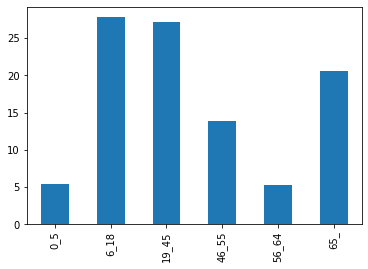

In [101]:
row = df.iloc[4]
row1 = row[[
          '0_5',
          '6_18',
          '19_45',
          '46_55',
          '56_64',
          '65_'         
]]

row1.plot(kind='bar')

In [102]:
row1

0_5       5.394191
6_18      27.80083
19_45    27.109267
46_55    13.831259
56_64     5.255878
65_      20.608575
Name: 4, dtype: object

create function that will plot bar plot for age distribution in specific settlement

In [103]:
def create_bar_plot(row, settlement_name):
    my_row = row
    my_row.reset_index(inplace=True)
    my_row = my_row.iloc[0]
    my_row = my_row[[
          '0_5',
          '6_18',
          '19_45',
          '46_55',
          '56_64',
          '65_'         
    ]]
    
    x_label = 'קבוצת גיל'
    y_label = 'אחוז מכלל התושבים'
    plt.figure()
    my_plot = my_row.plot(kind='bar', title=settlement_name[::-1])
    my_plot.set_xlabel(x_label[::-1])
    my_plot.set_ylabel(y_label[::-1])

    return my_plot

In [104]:
#row = df.loc['קרית ים']
#row
raanana = 'רעננה'
a= df.loc[df['שם_ישוב'] == raanana]
a

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,...,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס,0_5,6_18,19_45,46_55,56_64,65_
1250,8700,רעננה,42,פתח תקווה,47,כפר סבא,0,,93977,5905,...,29851,12511,8920,19313,6.283452,18.597104,31.764155,13.312832,9.491684,20.550773


<AxesSubplot:title={'center':'הננער'}, xlabel='ליג תצובק', ylabel='םיבשותה ללכמ זוחא'>

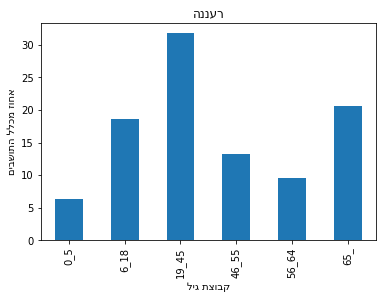

In [105]:
create_bar_plot(a, raanana)

In [106]:
def distribution_for_settlement(settlement_name: str, data_frame):
    my_df = data_frame.loc[data_frame['שם_ישוב'] == settlement_name]
    
    return create_bar_plot(my_df, settlement_name)

<AxesSubplot:title={'center':'םי תירק'}, xlabel='ליג תצובק', ylabel='םיבשותה ללכמ זוחא'>

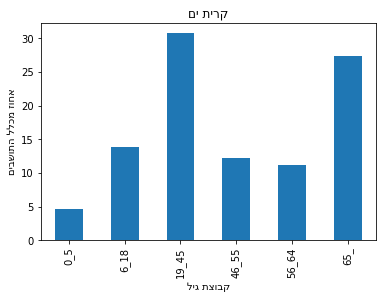

In [107]:
distribution_for_settlement(settlement_name='קרית ים' , data_frame=df)

<AxesSubplot:title={'center':'למרכ תריט'}, xlabel='ליג תצובק', ylabel='םיבשותה ללכמ זוחא'>

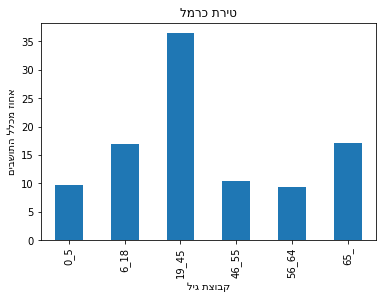

In [108]:
distribution_for_settlement(settlement_name='טירת כרמל' , data_frame=df)

We studied how to plot the population distribution for a settlement. Now lets improve the plots with headline and get plots for all the cities in Israel sort by residents amount 

In [109]:
df.sort_values(by=['סהכ'], ascending=False, inplace=True)
df = df.reset_index(drop=True)
df.head(50)

,סמל_ישוב,שם_ישוב,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,סהכ,גיל_0_5,...,גיל_19_45,גיל_46_55,גיל_56_64,גיל_65_פלוס,0_5,6_18,19_45,46_55,56_64,65_
0,3000,ירושלים,11,ירושלים,11,ירושלים,0,,1042259,118840,...,375666,91177,70618,122727,11.402156,25.255815,36.043440,8.748018,6.775475,11.775096
1,5000,תל אביב - יפו,51,תל אביב,51,"ת""א - מרכז",0,,565977,34499,...,224640,69317,49986,115227,6.095477,12.775784,39.690659,12.247317,8.831808,20.358955
2,4000,חיפה,31,חיפה,31,חיפה,0,,324291,19116,...,105041,39340,32661,79352,5.894706,15.042354,32.390970,12.131080,10.071510,24.469381
3,7900,פתח תקווה,42,פתח תקווה,42,פתח תקוה,0,,275734,21266,...,91022,35069,22655,50181,7.712506,20.142964,33.010800,12.718417,8.216252,18.199061
4,8300,ראשון לציון,44,רחובות,46,ראשון לציון,0,,274391,17871,...,94509,35195,27306,55310,6.512969,16.108400,34.443185,12.826587,9.951493,20.157367
5,7400,נתניה,41,השרון,41,נתניה,0,,259079,18399,...,83621,30000,24122,56860,7.101695,17.784923,32.276256,11.579480,9.310674,21.946974
6,70,אשדוד,61,אשקלון,69,אשדוד,0,,255353,20810,...,84380,29571,23706,45385,8.149503,20.168551,33.044452,11.580440,9.283619,17.773435
7,9000,באר שבע,62,באר שבע,62,באר שבע,0,,223450,16627,...,78476,24961,21812,42302,7.441038,17.575296,35.120161,11.170732,9.761468,18.931305
8,6100,בני ברק,52,רמת גן,54,בני ברק,0,,218949,36009,...,74104,13208,10109,18671,16.446296,30.531311,33.845325,6.032455,4.617057,8.527557
9,6600,חולון,53,חולון,53,חולון,0,,212914,13947,...,67864,27045,20382,46878,6.550532,17.283034,31.873902,12.702312,9.572879,22.017340


We will get list of all the settlement in Israel by descending size of population. Looping through this list will help to create the plots 

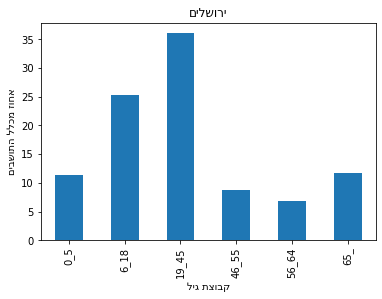

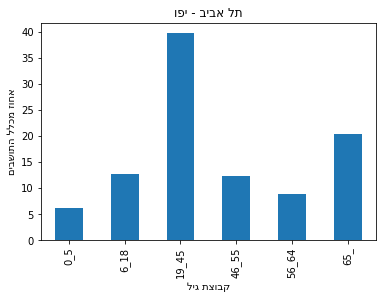

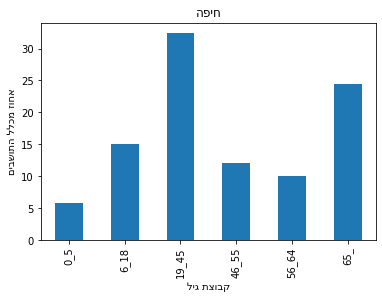

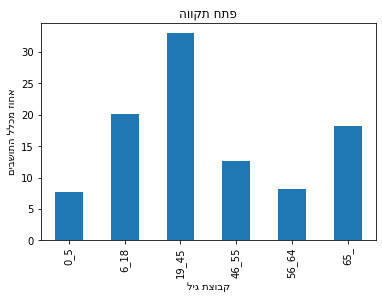

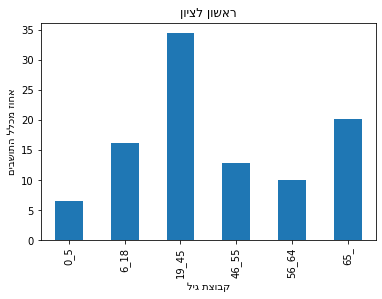

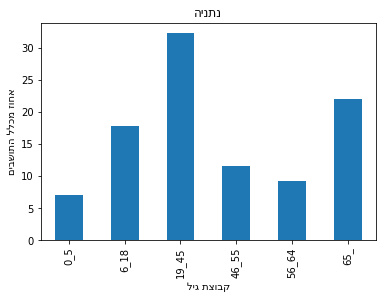

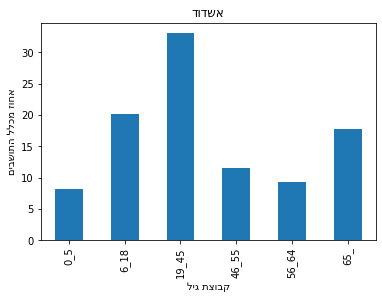

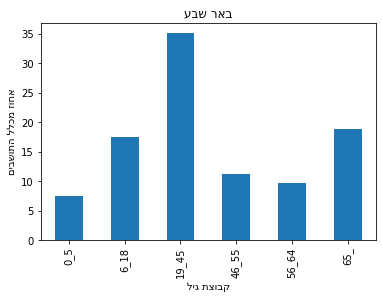

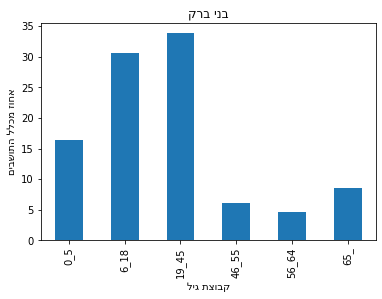

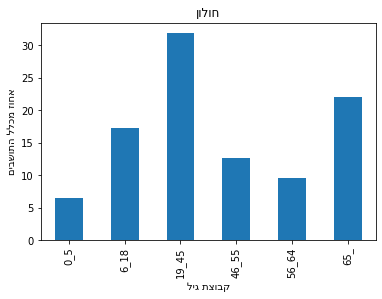

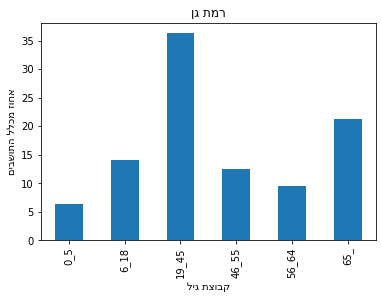

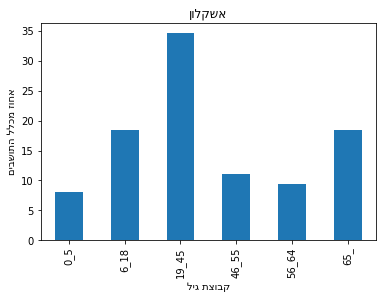

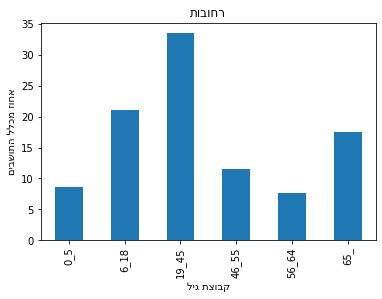

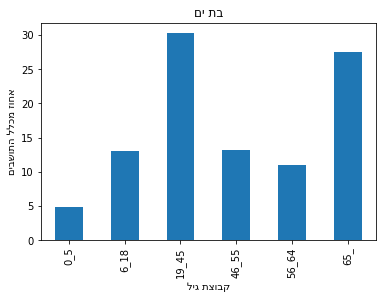

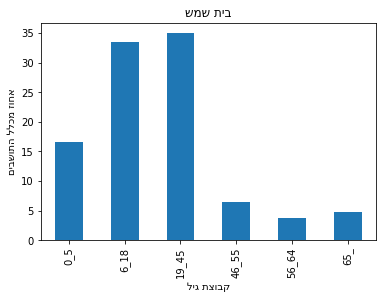

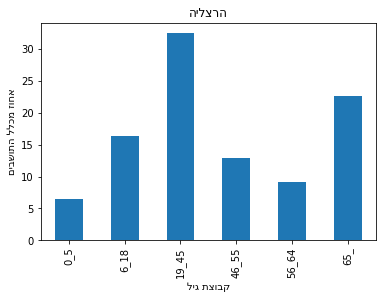

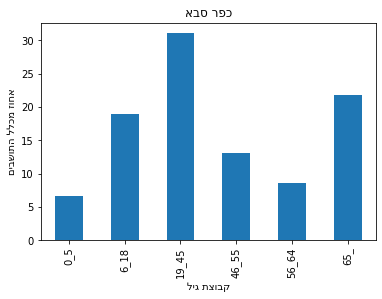

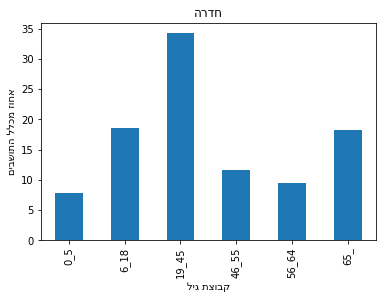

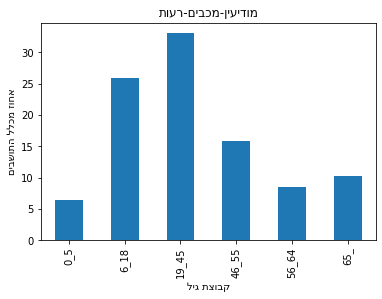

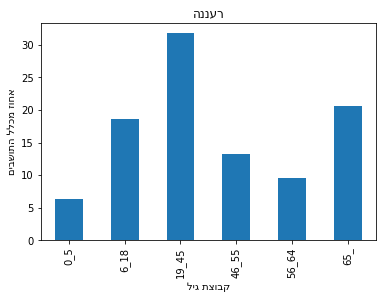

In [110]:
settlement_name_list = df['שם_ישוב'].tolist()
plots_list = []
for settlement_name in settlement_name_list[:20]:
    plots_list.append(distribution_for_settlement(settlement_name=settlement_name, data_frame=df))
    

Interesting thing is to look were the group age 6-18 is the largest to see the future of a settlement
For example see Bnei Brak and Rishon Lezion. Two well established settlement. One can figure out from this charts were a future demand for in house real estate seekers will be more significant.

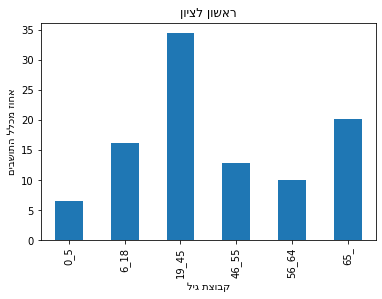

In [111]:
plots_list[4].figure

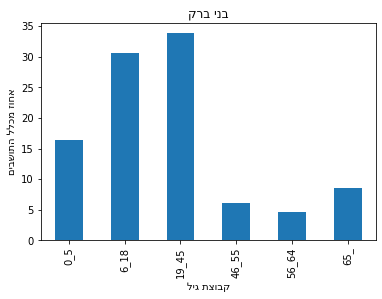

In [112]:
plots_list[8].figure

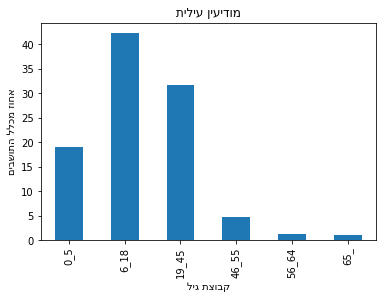

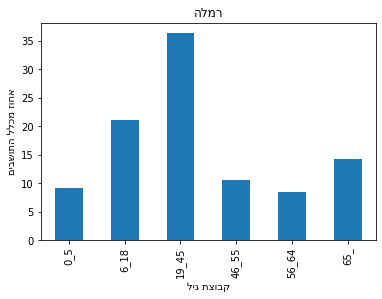

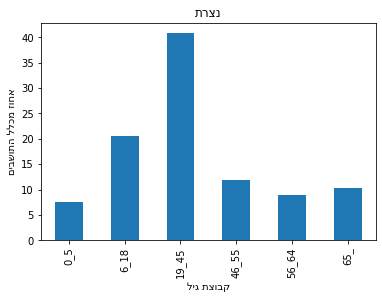

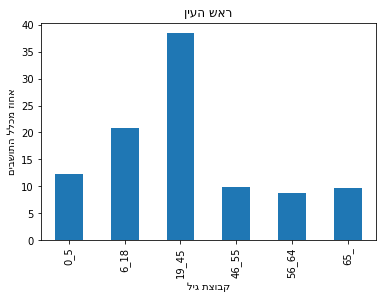

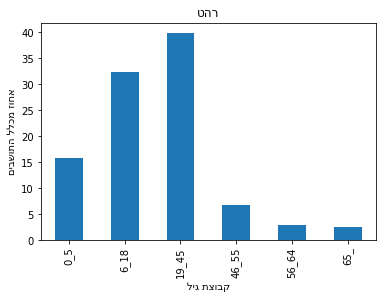

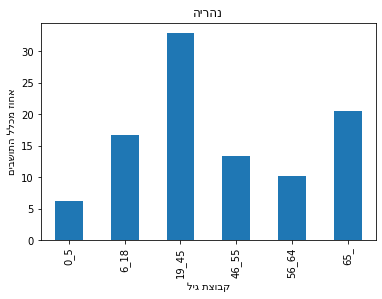

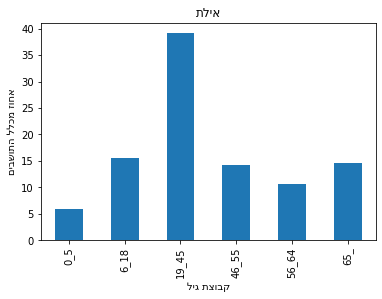

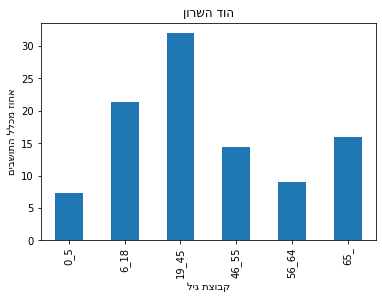

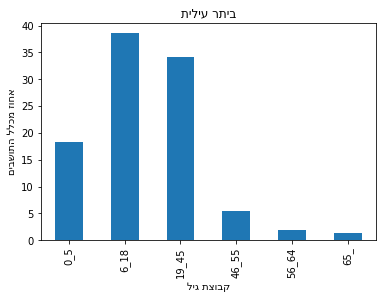

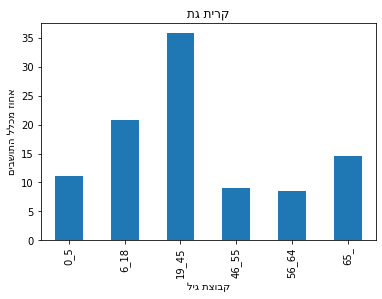

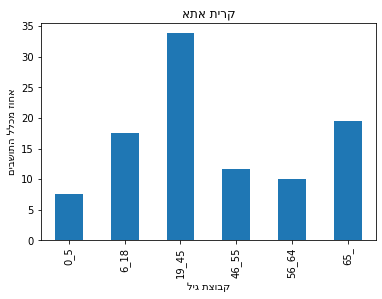

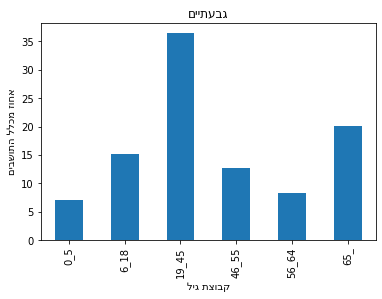

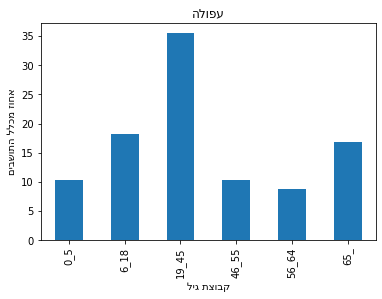

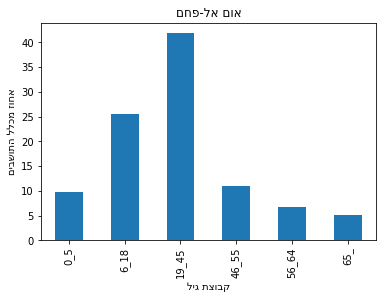

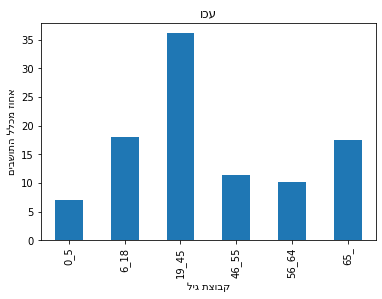

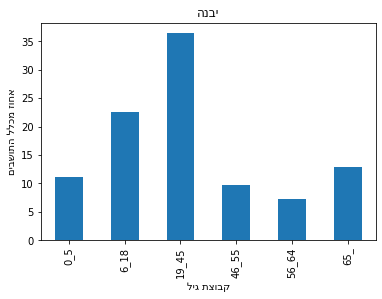

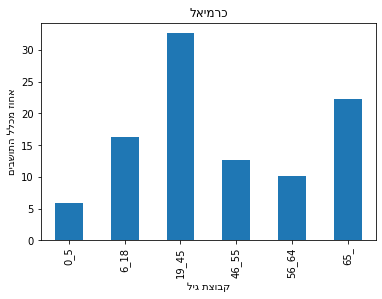

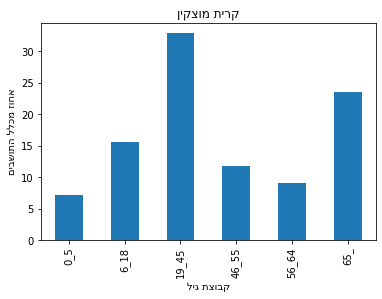

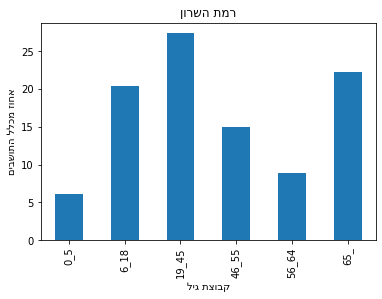

In [113]:
settlement_name_list = df['שם_ישוב'].tolist()
plots_list = []
for settlement_name in settlement_name_list[21:40]:
    plots_list.append(distribution_for_settlement(settlement_name=settlement_name, data_frame=df))

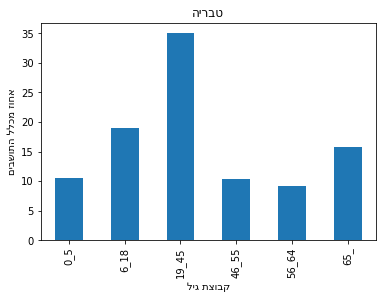

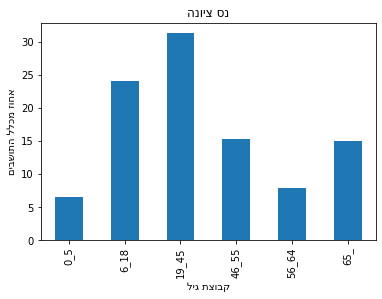

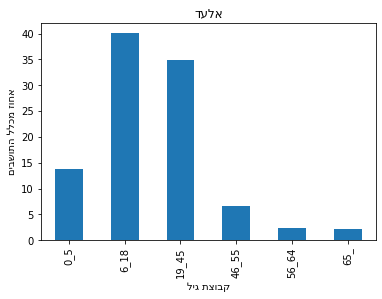

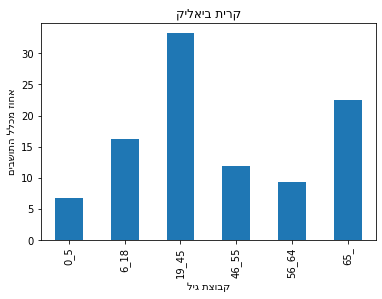

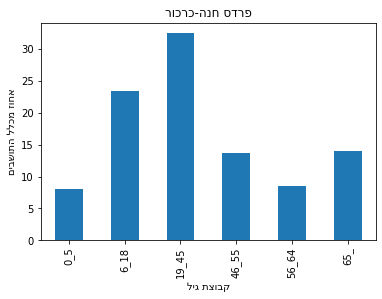

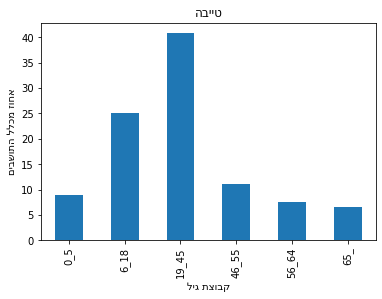

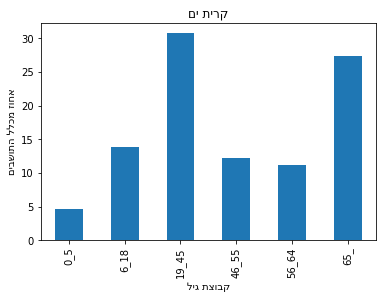

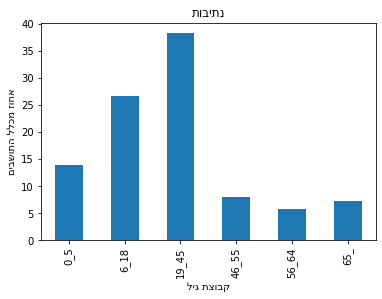

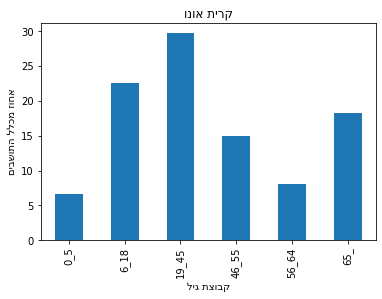

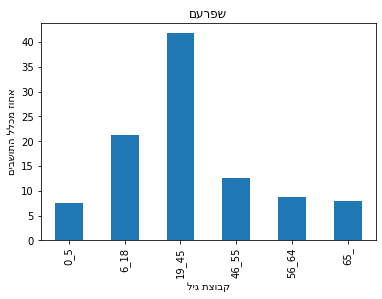

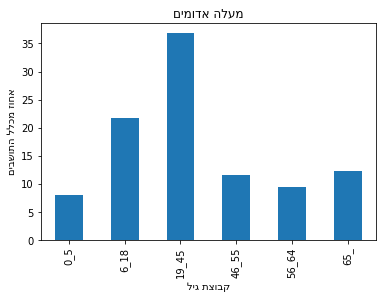

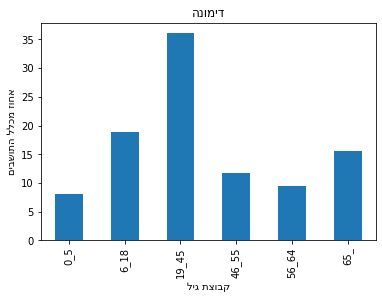

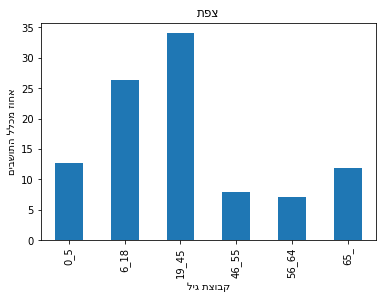

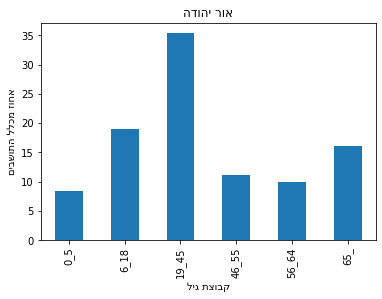

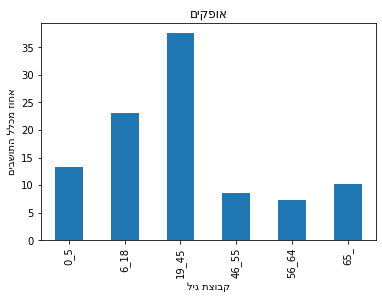

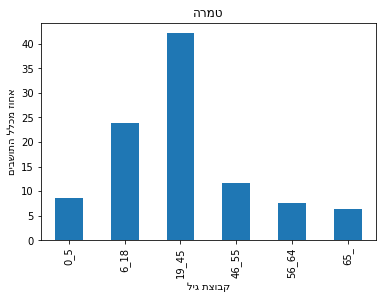

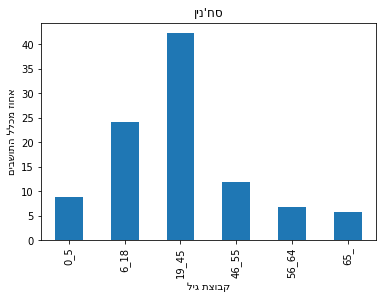

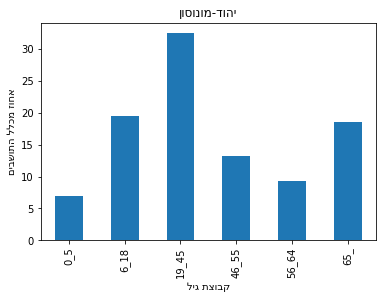

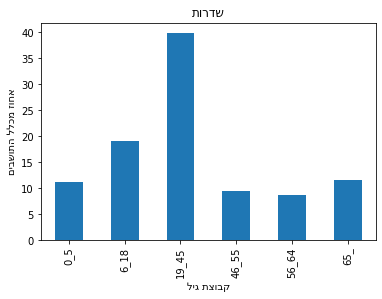

In [114]:
settlement_name_list = df['שם_ישוב'].tolist()
plots_list = []
for settlement_name in settlement_name_list[41:60]:
    plots_list.append(distribution_for_settlement(settlement_name=settlement_name, data_frame=df))

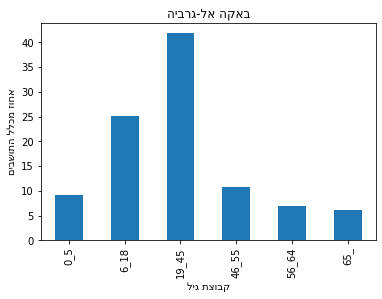

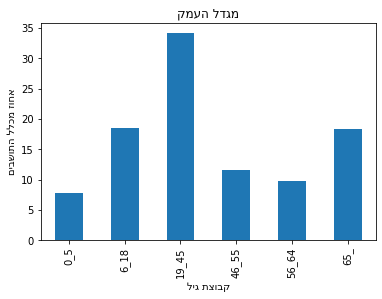

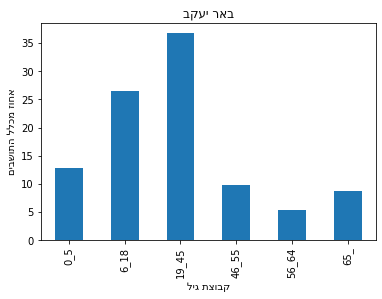

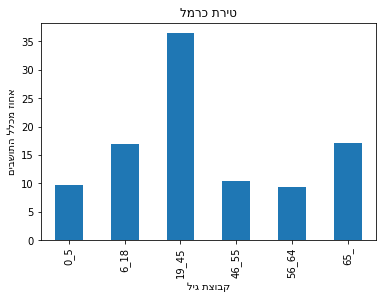

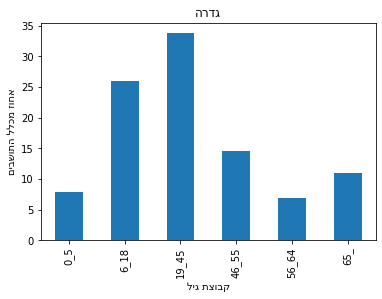

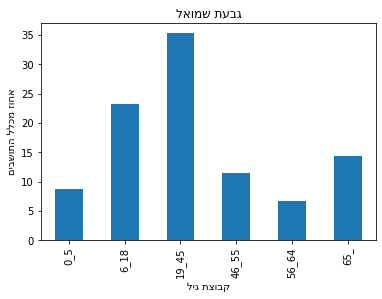

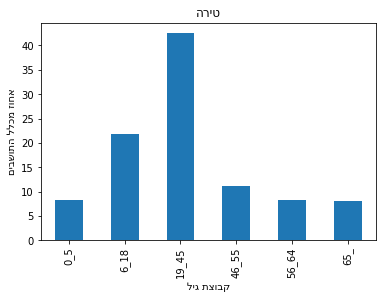

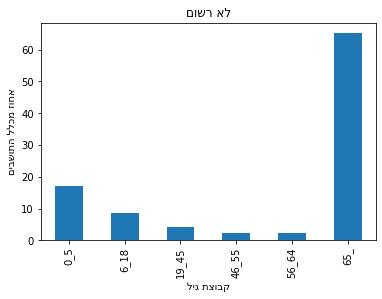

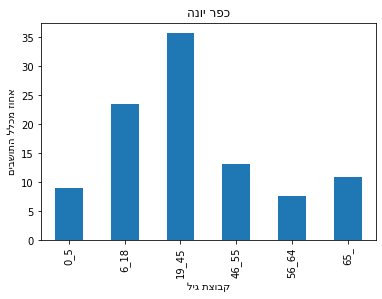

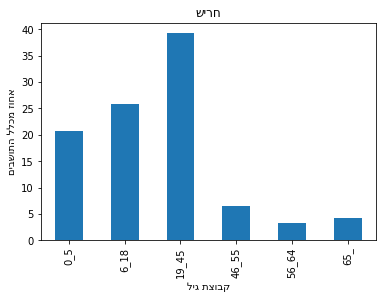

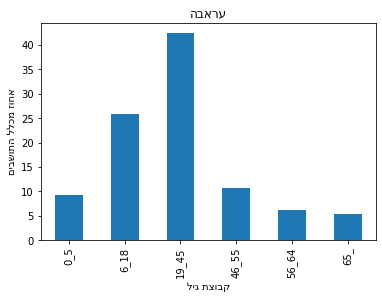

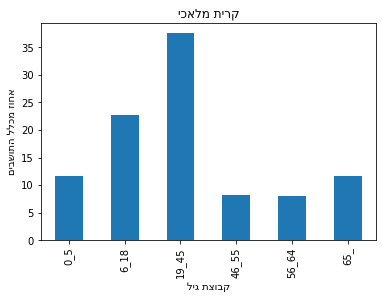

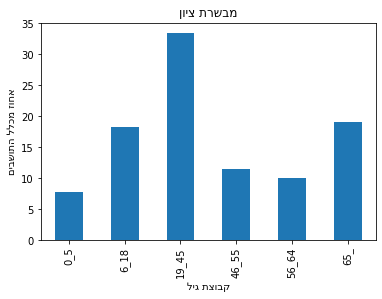

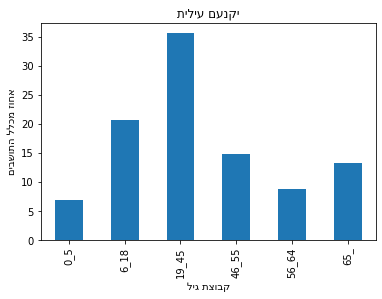

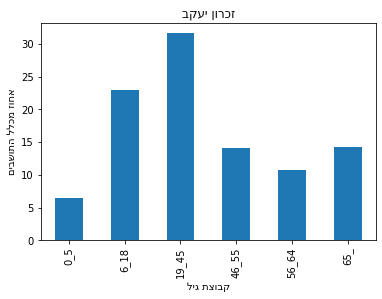

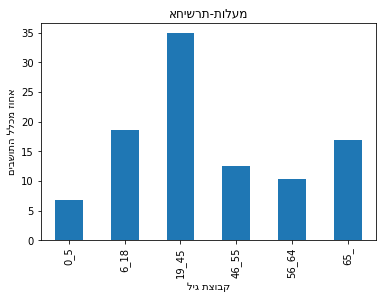

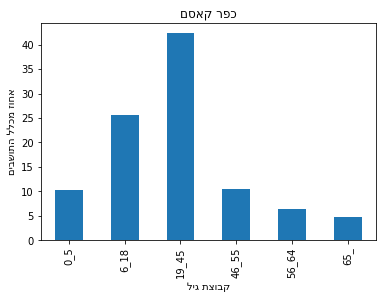

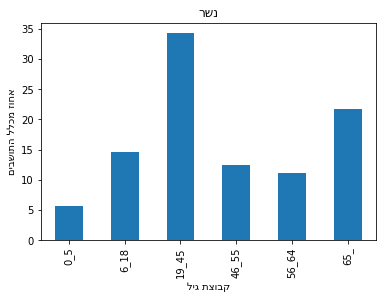

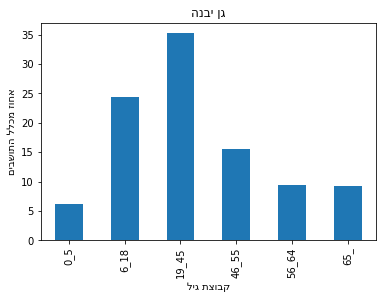

In [115]:
settlement_name_list = df['שם_ישוב'].tolist()
plots_list = []
for settlement_name in settlement_name_list[61:80]:
    plots_list.append(distribution_for_settlement(settlement_name=settlement_name, data_frame=df))